# Initial feature exploration
Using a generic heatmap to identify possible avenues of correlation between features presented by NFL dataset. Only the libraries for storing the CSV as a dataframe, generating a heatmap, and graphically presenting the heatmap are required.

In [1]:
import pandas as pd #Dataframes
import seaborn as sb #Heatmap
import matplotlib.pyplot as plt #Visual
from sklearn import preprocessing #Normalization

Load in the CSV as provided by https://github.com/fivethirtyeight/nfl-elo-game

In [2]:
df = pd.read_csv('data/external/nfl_games.csv')
df.head()

,date,season,neutral,playoff,team1,team2,elo1,elo2,elo_prob1,score1,score2,result1
0,1920-09-26,1920,0,0,RII,STP,1503.947,1300.000,0.824651,48,0,1.0
1,1920-10-03,1920,0,0,AKR,WHE,1503.420,1300.000,0.824212,43,0,1.0
2,1920-10-03,1920,0,0,RCH,ABU,1503.420,1300.000,0.824212,10,0,1.0
3,1920-10-03,1920,0,0,DAY,COL,1493.002,1504.908,0.575819,14,0,1.0
4,1920-10-03,1920,0,0,RII,MUN,1516.108,1478.004,0.644171,45,0,1.0


Remove date, season, and teams so we can correlate information such as neutral, playoff, elo, score, and the results

In [3]:
df = df.drop(['date','season','team1','team2'],1)
df.head()

,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1
0,0,0,1503.947,1300.000,0.824651,48,0,1.0
1,0,0,1503.420,1300.000,0.824212,43,0,1.0
2,0,0,1503.420,1300.000,0.824212,10,0,1.0
3,0,0,1493.002,1504.908,0.575819,14,0,1.0
4,0,0,1516.108,1478.004,0.644171,45,0,1.0


Considering the binary representation of neutral, playoff, and result1 I will use a MinMax normalization as a Z-Score may sway values due to large range of possible elo's. The equation for MinMax scaling is displayed below:  
  
$$\large x_{scaled}=\frac{x-X_{min}}{X_{max}-X_{min}}$$  
  
Important to notice as I am applying the normalization over every column of the dataframe is that binary components won't be affected as they will always subtract 0 and divide by 1 in the dataframe as defined here.

In [4]:
scaler = preprocessing.MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df = pd.DataFrame(df_scaled, columns=df.columns)
df.head()

,neutral,playoff,elo1,elo2,elo_prob1,score1,score2,result1
0,0.0,0.0,0.533772,0.207017,0.837849,0.666667,0.0,1.0
1,0.0,0.0,0.533040,0.207017,0.837361,0.597222,0.0,1.0
2,0.0,0.0,0.533040,0.207017,0.837361,0.138889,0.0,1.0
3,0.0,0.0,0.518572,0.502728,0.561234,0.194444,0.0,1.0
4,0.0,0.0,0.550660,0.463902,0.637218,0.625000,0.0,1.0


Now that our values are normalized, we can generate a correlation matrix that might show easy features to build from

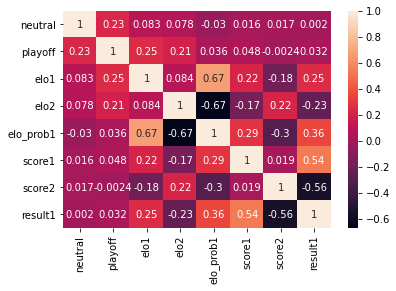

In [6]:
corr_df = df.corr()
sb.heatmap(corr_df, annot=True)
plt.show()